<a href="https://colab.research.google.com/github/connormarshall/machine-learning/blob/master/image-classifier/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Description: Image classification with tensorflow/keras

# Imports:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')

In [ ]:
# Load dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

label:  frog


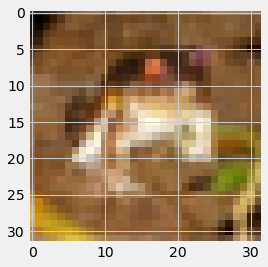

In [4]:
# Presenting the data:
i = 0
plot.imshow(x_train[i])

classification = ['airplane', \
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'
  ]

label = y_train[i][0]
print('label: ', classification[label] )

In [5]:
# Convert labels into number sets
y_train_activation = to_categorical(y_train)
y_test_activation = to_categorical(y_test)

# Normalise pixels from 0 - 255 to 0 - 1
x_train = x_train / 255
x_test = x_train / 255

In [6]:
# Model architecture
model = Sequential()

# Input Convolution layer, 32 5x5 RELU feature maps
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )
# Pooling layer: Pools maximums of RELU feature maps. 2x2 pixel filter
model.add(MaxPooling2D(pool_size=(2,2)))
# Second Convolutional layer
model.add( Conv2D(32, (5,5), activation='relu') )
# Second Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flattening layer: reduces activations to linear array
model.add(Flatten())
# 1000 Neuron regular dense layer
model.add(Dense(1000, activation='relu'))
# Dropout layer: randomly culls activations at a rate of 50%
model.add(Dropout(0.5))
# 500 Neuron regular dense layer
model.add(Dense(500, activation='relu'))
# Dropout layer: randomly culls activations at a rate of 50%
model.add(Dropout(0.5))
# 250 Neuron regular dense layer
model.add(Dense(250, activation='relu'))
# Dropout layer: randomly culls activations at a rate of 50%
# 10 Neuron output layer, softmax to extract output
model.add(Dense(10, activation='softmax'))


In [8]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model
hist = model.fit(x_train, y_train_activation,
                 batch_size = 256,
                 epochs = 10, 
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 2s 11ms/step - loss: 2.0212 - accuracy: 0.2298 - val_loss: 1.4890 - val_accuracy: 0.4482
Epoch 2/10
157/157 [==============================] - 1s 9ms/step - loss: 1.4711 - accuracy: 0.4560 - val_loss: 1.3500 - val_accuracy: 0.5237
Epoch 3/10
157/157 [==============================] - 1s 9ms/step - loss: 1.2989 - accuracy: 0.5327 - val_loss: 1.2167 - val_accuracy: 0.5666
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 1.2026 - accuracy: 0.5730 - val_loss: 1.2219 - val_accuracy: 0.5672
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 1.0941 - accuracy: 0.6082 - val_loss: 1.0456 - val_accuracy: 0.6309
Epoch 6/10
157/157 [==============================] - 1s 9ms/step - loss: 1.0150 - accuracy: 0.6395 - val_loss: 1.0153 - val_accuracy: 0.6412
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.9580 - accuracy: 0.6618 - val_loss: 1.0321 - val_accuracy: 0.6471
Epoch

1563/1563 [==============================] - 4s 3ms/step - loss: 4.6311 - accuracy: 0.1000


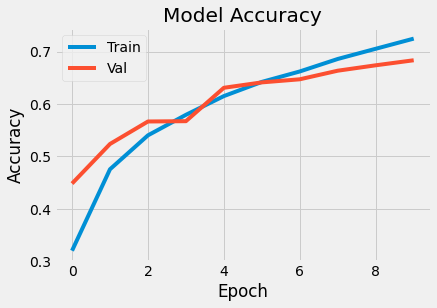

In [10]:
# Evaluate the model
model.evaluate(x_test, y_train_activation)[1]
plot.plot(hist.history['accuracy'])
plot.plot(hist.history['val_accuracy'])
plot.title('Model Accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper left')
plot.show()

1563/1563 [==============================] - 4s 3ms/step - loss: 4.6311 - accuracy: 0.1000


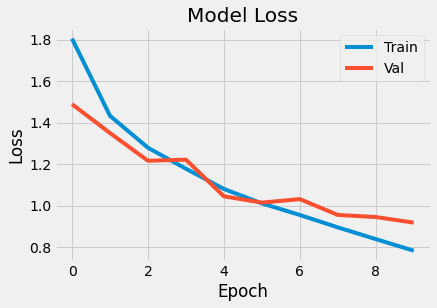

In [11]:
# Evaluate the model
model.evaluate(x_test, y_train_activation)[1]
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model Loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper right')
plot.show()

predicted:  frog
actual:  frog
correct


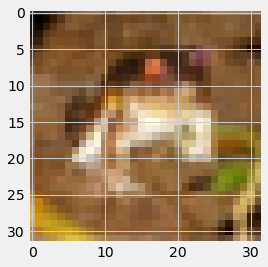

predicted:  truck
actual:  truck
correct


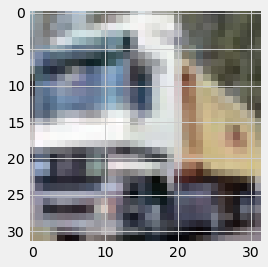

predicted:  truck
actual:  truck
correct


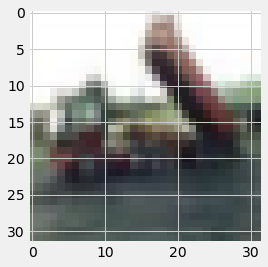

predicted:  deer
actual:  deer
correct


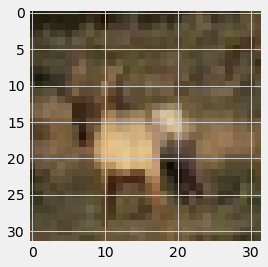

predicted:  automobile
actual:  automobile
correct


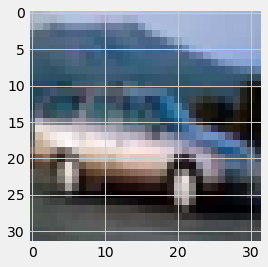

predicted:  automobile
actual:  automobile
correct


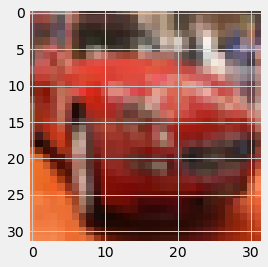

predicted:  bird
actual:  bird
correct


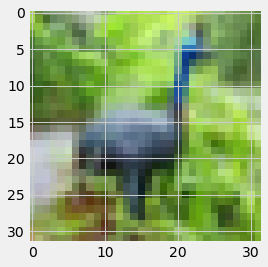

predicted:  horse
actual:  horse
correct


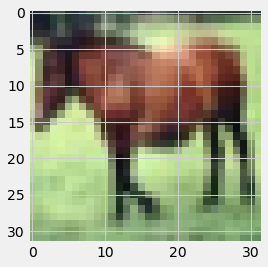

predicted:  ship
actual:  ship
correct


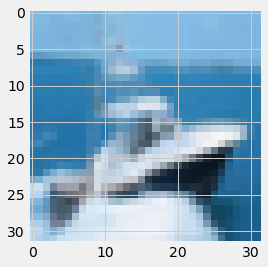

predicted:  cat
actual:  cat
correct


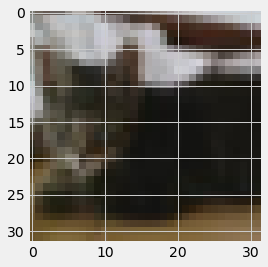

predicted:  deer
actual:  deer
correct


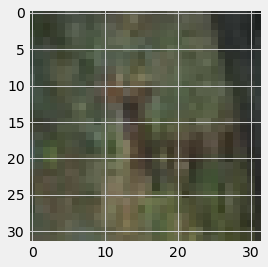

predicted:  horse
actual:  horse
correct


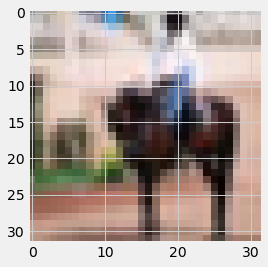

predicted:  horse
actual:  horse
correct


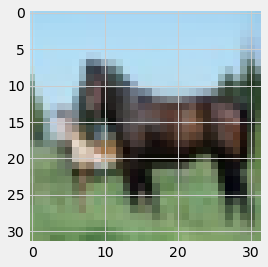

predicted:  deer
actual:  bird
incorrect


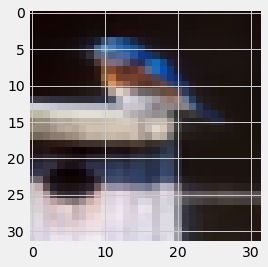

predicted:  truck
actual:  truck
correct


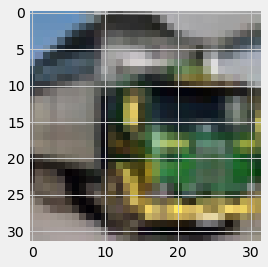

predicted:  truck
actual:  truck
correct


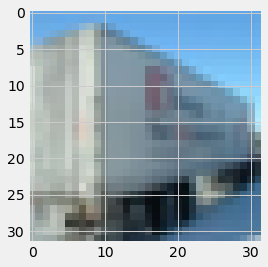

predicted:  truck
actual:  truck
correct


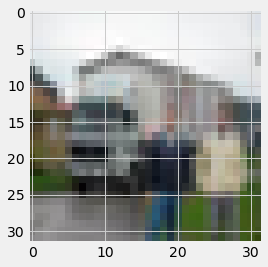

predicted:  cat
actual:  cat
correct


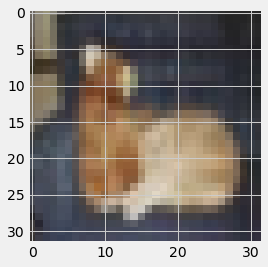

predicted:  frog
actual:  bird
incorrect


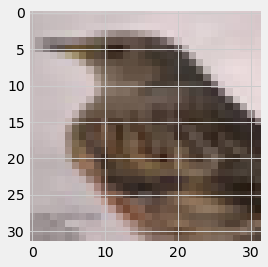

predicted:  frog
actual:  frog
correct


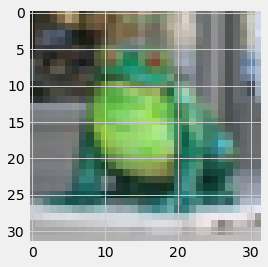



the model got  18 / 20  correct!


In [62]:
# Demo:

images = 20
predictions = [0] * images
accuracy = 0

for i in range(0,images):
  # Make predictions
  predictions[i] = model.predict(np.array([x_train[i]]))
  # Get the right answer
  label = y_train[i][0]
  # Extract answers
  pred = classification[ np.argmax(predictions[i])]
  actual = classification[label]
  #print
  print("predicted: ", pred)
  print("actual: ", actual)

  correct = False
  if pred == actual:
    correct = True

  if correct:
    accuracy+=1
    print("correct")
  else:
    print("incorrect")

  # Show image and plot
  plot.imshow(x_train[i])
  plot.show()


print("\n\nthe model got ", accuracy, "/", images, " correct!")